# Analysis Data Text

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

## Load Data

Load data **`indonlu_smsa_doc-sentiment-prosa.tsv`** with column **text** and **label**

In [3]:
df = pd.read_csv('indonlu_smsa_doc-sentiment-prosa.tsv',sep="\t", header = None)

In [4]:
# 1. jumlah data yang pakai (11rb; train:10rb, backtest: 1rb)
# 2. datanya darimana (twitter/kaggle)
# 3. jumlah labelnya (3: positive/negative/neutral)
# 4. rentang waktu pengambilan data ()

In [10]:
df = pd.read_csv('indonlu_smsa_doc-sentiment-prosa.tsv',sep="\t", header = None)

In [6]:
def clean_text(text):
    text = text.replace(",","")
    return text

In [7]:
for chunk in df:
    print(clean_text(chunk.values[0][0]))
    print("")

warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas  dipadu keahlian memasak  dipadu kretivitas  jadilah warung yang menyajikan menu utama berbahan tahu  ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya  tidak kalah dengan yang asli dari tegal !

pantesan saja anis baswedan diganti  kerja nya tidak benar jadi menteri .

kelezatan batagor dan siomay kingsley terletak pada kandungan ikan tenggiri sebagai bahan baku dan berpadu dengan bumbu serta rempah pilihan . kedai kecil ini selalu padat pengunjung dan tersedia pula pilihan makanan lain seperti mi ayam dan es campur . baru-baru ini kedai direnovasi cukup besar untuk menambah daya tampung dan kenyamanan .

restoran ini amat unik  tempat duduk sangat santai  ada air terjun dan suasana sangat nyaman . makanan serba serbi sedap dan harga nya berpatutan . pelayanan sangat pantas  cuma kal

In [ ]:
# 100 column, 10jt row --> 1 Milliar data

In [ ]:
# 100 column * 1jt row --> 100jt data

In [ ]:
# 100 column * 500rb row --> 5jt data

In [ ]:
# 2 column, 10jt row --> 20jt data

In [12]:
chunk.values[0]

array(['minimal baca dong keluhan di inbox dulu bagus banget respon nya sekarang parah tidak ada respon sama sekali',
       'negative'], dtype=object)

In [13]:
df.columns  = ['tweet', 'label']

In [14]:
df['length_of_tweet'] = df['tweet'].apply(lambda x: len(x))

In [37]:
def normalize_column(values):
    min_values = min(values)
    max_values = max(values)
    
    new_values = []
    for value in values:
        new_value = (value - min_values) / (max_values - min_values)
        new_values.append(new_value)
    return new_values

In [39]:
df['normalized_length_of_tweet'] = normalize_column(df['length_of_tweet'])

In [43]:
df['normalized_length_of_tweet']

0        0.710993
1        0.175532
2        0.320922
3        0.159574
4        0.374113
           ...   
10995    0.015957
10996    0.271277
10997    0.070922
10998    0.113475
10999    0.680851
Name: normalized_length_of_tweet, Length: 11000, dtype: float64

Terlebih dahulu kita mengecek data yang akan kita proses sebelum dilakukan analisis

## Cek data 5 teratas dan terbawah

In [6]:
# 5 teratas
df.head()

,tweet,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [7]:
# 5 teratas
df.tail()

,tweet,label
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative
10999,meskipun sering belanja ke yogya di riau junct...,positive


## Cek jumlah kolom dan total data

Data yang diolah memiliki 2 kolom dan total data 11000

In [8]:
df.shape

(11000, 2)

## Cek total duplikat data

Total data yang duplikat sejumlah 67

In [9]:
df.loc[df.duplicated(keep=False)].sort_values('tweet')

,tweet,label
6078,aman gemstone menyediakan berbagai cincin / pe...,neutral
3163,aman gemstone menyediakan berbagai cincin / pe...,neutral
1863,apresiasi,positive
2616,apresiasi,positive
10950,bank bca di pgc payah sekali pelayanan nya . j...,negative
...,...,...
7083,tidak menyesal,positive
1720,tidak senang,negative
9636,tidak senang,negative
9769,wow iya kok hitam mental mahal amat ya kenapa ...,negative


Menghilangkan data yang duplikat

In [10]:
df = df.drop_duplicates()

Cek total data yang duplikat. Hasilnya data yang duplikat sudah tidak ada.

In [11]:
df.duplicated().sum()

0

## Cek Missing Values

Jalankan perintah di bawah untuk mendeteksi missing values.

In [12]:
df.isna().sum()

tweet    0
label    0
dtype: int64

Jalankan perintah untuk melihat persentase missing values dari setiap kolom. 

Terlihat pada setiap kolom memiliki persentase 0. Ini menandakan data kita aman dari missing values

In [13]:
df.isna().sum()

tweet    0
label    0
dtype: int64

Cek kondisi data terakhir

In [14]:
df

,tweet,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [15]:
# 1. Sentiment apa yang paling banyak (proporsi labels)
# 2. jumlah kata per row
# 3. Untuk masing masing label, 10 Kata apa yang paling sering muncul.
# 4. Apakah ada tweet yang duplicated, tapi beda label.

## Buat kolom baru bernama "total_char" berisi panjang karakter dari setiap teks.

In [17]:
df['total_char'] = df['tweet'].apply(len)

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_char" yang berisi masing-masing panjang karakter dari setiap teks.


In [ ]:
df.head()

## Buat kolom baru bernama "total_word" berisi banyaknya kata dari setiap teks.

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_word" yang berisi masing-masing panjang kata dari setiap teks.

In [16]:
df['total_word'] = df['tweet'].apply(lambda sent: len(sent.split()))

In [19]:
# Cek data teratas
df.head()

,tweet,label,total_char,total_word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,184,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214,38


In [20]:
splited_tweet = df['tweet'].apply(lambda sent: sent.split())

In [21]:
positive_words = {}
neutral_words = {}
negative_words = {}
for lab, twe in zip(df['label'], splited_tweet):
    if lab == 'positive':
        for word in twe:
            try:
                positive_words[word] += 1
            except KeyError:
                positive_words[word] = 1
    if lab == 'neutral':
        for word in twe:
            try:
                neutral_words[word] += 1
            except KeyError:
                neutral_words[word] = 1
    if lab == 'negative':
        for word in twe:
            try:
                negative_words[word] += 1
            except KeyError:
                negative_words[word] = 1

In [22]:
kamus_negative = ['sombong']
kamus_positive = []

In [23]:
contoh_text = df.loc[df.label == 'negative'].iloc[0].values

In [24]:
score = 0
for word in contoh_text[0].split():
    if word in kamus_negative:
        score = score-1
    elif word in kamus_positive:
        score = score+1
    else:
        score = score+0
    

In [25]:
sorted(positive_words.items(), key = lambda x:x[1], reverse=True)[:10]

[('.', 18293),
 (',', 11856),
 ('nya', 10911),
 ('yang', 7365),
 ('dan', 6421),
 ('di', 6176),
 ('enak', 3271),
 ('dengan', 3238),
 ('tempat', 3219),
 ('makanan', 3164)]

In [26]:
sorted(negative_words.items(), key = lambda x:x[1], reverse=True)[:10]

[('.', 4901),
 (',', 3428),
 ('nya', 2342),
 ('tidak', 1932),
 ('yang', 1733),
 ('dan', 1243),
 ('di', 1197),
 ('saya', 1082),
 ('ini', 761),
 ('saja', 655)]

In [27]:
sorted(neutral_words.items(), key = lambda x:x[1], reverse=True)[:10]

[(',', 675),
 ('.', 565),
 ('di', 334),
 ('yang', 219),
 ('dan', 215),
 ('nya', 205),
 ('-', 177),
 ('untuk', 144),
 (':', 133),
 ('dengan', 130)]

In [40]:
import numpy as np
import seaborn as sns

In [42]:
np.quantile(df['total_char'], 0.01)

8.0

In [38]:
df.loc[df.total_char<449].mean()

C:\Users\bdrex\AppData\Local\Temp\ipykernel_16792\1414136590.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[df.total_char<449].mean()


total_char    186.725374
total_word     32.579837
dtype: float64

In [43]:
df.describe()

,total_char,total_word
count,10933.000000,10933.000000
mean,189.614561,33.060551
std,120.833410,21.141323
min,3.000000,1.000000
25%,91.000000,16.000000
50%,161.000000,28.000000
75%,276.000000,48.000000
max,567.000000,110.000000


C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_word', ylabel='Density'>

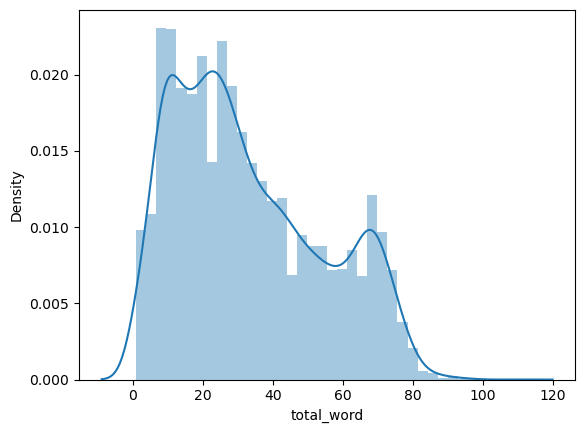

In [44]:
sns.distplot(df.total_word)

In [47]:
df['splitted_tweet'] = [tweet.split(" ") for tweet in df['tweet']]

C:\Users\bdrex\AppData\Local\Temp\ipykernel_16792\3329093283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['splitted_tweet'] = [tweet.split() for tweet in df['tweet']]


In [50]:
count_of_words = {}
for splitted_tweet in df['splitted_tweet']:
    for word in splitted_tweet:
        try:
            count_of_words[word] += 1
        except KeyError:
            count_of_words[word] = 1
#     break

In [55]:
for x in count_of_words.items():
    print(x)
    break

('warung', 192)


<AxesSubplot:xlabel='label'>

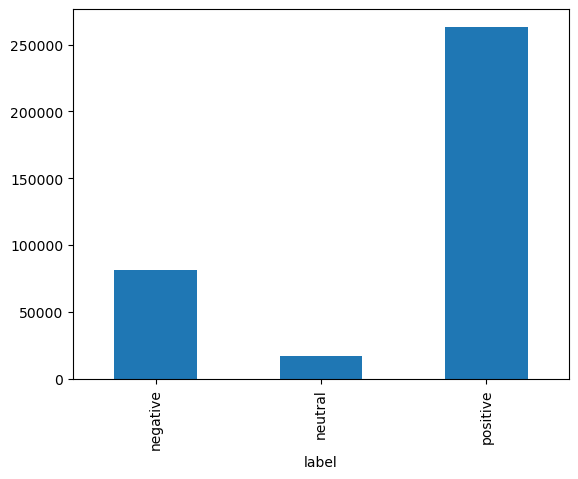

In [59]:
df.groupby('label').total_word.sum().plot(kind='bar')

<AxesSubplot:xlabel='label'>

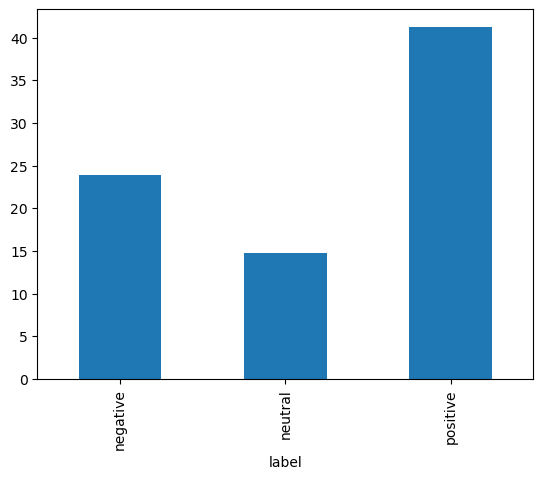

In [60]:
df.groupby('label').total_word.mean().plot(kind='bar')

<AxesSubplot:xlabel='label'>

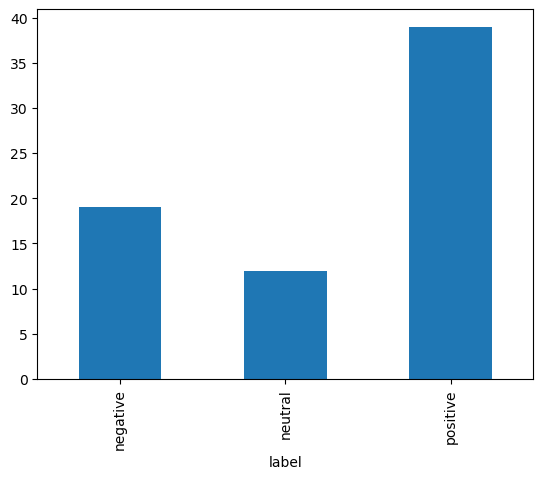

In [61]:
df.groupby('label').total_word.median().plot(kind='bar')

# Analyze

Descriptive Analytic dalam kasus teks sering disebut Exploratory Data Analysis (EDA). EDA secara sederhana bisa dimaknai sebagai proses untuk memahami data sebelum diproses untuk tujuan tertentu atau langkah selanjutnya.

Apakah proses akan berhenti dalam tahap EDA atau tidak tergantung Problem Definition yang sudah kita tentukan sebelumnya.

Berdasarkan variabel (kolom) yang diproses, EDA bisa dibagi sebagai berikut:


*   Univariat Analysis: Analisis dengan melibatkan satu variabel
*   Bivariat Analysis: Analisis dengan melibatkan dua variabel:
*   Multivariat Analysis: Analisis dengan melibatkan lebih dari dua variabel. 

Dari jenis analisis di atas tidak semua harus dilakukan. Lagi-lagi tergantung Problem Definition dan karaktistik data yang kita miliki.



## Univariate Analysis

### Descriptive Statistic

Untuk mengeksplorasi data kita bisa menggunakan ilmu Statistika Deskriptif. Terkait Statistik Deskriptif bisa kita pelajari lebih dalam pada chapter selanjutnya.

Menurut Statistika Deskriptif, ada 3 cara untuk mendeskripsikan data:

* Measures of Central Tendency
   * Mean
   * Median
   * Mode
* Measures of Spread
   * Range
   * Quartile dan Interquartile Range
   * Variance
   * Standard deviasi
* Measures to Describe Shape of Distribution
   * Skewness
   * Kurtosis

#### Measures of Central Tendency
Merupakan suatu cara untuk mendeskripsikan posisi tengah dari distribusi frekuensi pada suatu kelompok

##### Mean

Digunakan untuk mencari rata-rata dari kolom/variabel yang bertipe numerical.

Pada hasil berikut mean "total_char" memiliki rata-rata panjang karakter 189.6, sedangkan "total_word" memiliki rata-rata 33.0 kata.

In [27]:
df = df.drop_duplicates()

In [28]:
print(df['total_word'].mean())
print(df['total_char'].mean())

33.060550626543495
189.61456141955549


In [29]:
df[['total_word','total_char']].mean()

total_word     33.060551
total_char    189.614561
dtype: float64

##### Median

Digunakan untuk mencari nilai tengah dari suatu data numerical yang diurutkan. Jika jumlah data ganjil, maka nilai median tepat berada tengah dari data, sedangkan apabila genap maka nilai median berada diantara kedua nilai yang berada ditengah.

Pada hasil berikut median "total_char" memiliki nilai tengah panjang karakter 161.0, sedangkan "total_word" memiliki nilai tengah 28.0 kata.

In [30]:
df[['total_word','total_char']].median()

total_word     28.0
total_char    161.0
dtype: float64

##### Mode

Digunakan untuk mencari frekuensi data yang paling sering muncul.

Pada hasil berikut mode "total_char" memiliki frekuensi yang paling sering muncul yakni panjang karakter 120, sedangkan "total_word" memiliki frekuensi yang paling sering muncul 10 kata.

In [31]:
df[['total_word','total_char']].mode()

,total_word,total_char
0,10,120


#### Measures of Spread
Merupakan suatu cara untuk mendeskripsikan seberapa menyebar data yang ada.

##### Range

Digunakan untuk mencari perbedaan antara nilai terbesar dengan nilai terkecil pada data.

Pada hasil berikut range "total_char" memiliki perbedaan sebesar 564, sedangkan "total_word" memiliki perbedaan sebesar 109 kata.

In [33]:
df[['total_word','total_char']].max() - df[['total_word','total_char']].min()

total_word    109
total_char    564
dtype: int64

##### Quartile dan IQR

Digunakan ketika data dibagi menjadi 4 bagian (25%). Terdapat 3 jenis Quartile yaitu Q1 yang merupakan nilai antara median dengan data terkecil, Q2 yang merupakan Median data, dan Q3 adalah nilai antara median dengan data terbesar.

Nilai Quartile selanjutnya dikombinasikan dengan nilai Interquartile Range (IQR). Untuk menghasil IQR kita dapat mengurangi Q3 dengan Q1. Dari IRQ kita dapat menemukan batas atas dan batas bawah dari sebuah data.

Hasil dibawah menunjukkan nilai sisi bawah dari "total_char" tidak memiliki outlier, sedangkan sisi atas dari "total_char" memiliki outlier.

In [34]:
import numpy as np

In [48]:
# Cari nilai minimum


# Cari nilai maksimum


# Cari Quartile 1
quartile_1_char = np.quantile(df['total_char'],0.25)
quartile_1_word = np.quantile(df['total_word'],0.25)

print(f'Quartile 1 Total Char: {quartile_1_char}')
print(f'Quartile 1 Total Word: {quartile_1_word}')

# Cari Quartile 2
quartile_2_char = np.quantile(df['total_char'],0.5)
quartile_2_word = np.quantile(df['total_word'],0.5)
print(f'Quartile 2 Total Char: {quartile_2_char}')
print(f'Quartile 2 Total Word: {quartile_2_word}')

# Cari Quartile 3
quartile_3_char = np.quantile(df['total_char'],0.75)
quartile_3_word = np.quantile(df['total_word'],0.75)
print(f'Quartile 3 Total Char: {quartile_3_char}')
print(f'Quartile 3 Total Word: {quartile_3_word}')

# Cari IQR
iqr_char = quartile_3_char - quartile_1_char
iqr_word = quartile_3_word - quartile_1_word
print(f'IQR Total Char: {iqr_char}')
print(f'IQR Total Word: {iqr_word}')

# Cari batas bawah
lower_limit_char = quartile_1_char - (1.5*iqr_char)
lower_limit_word = quartile_1_word - (1.5*iqr_word)

print(f'Lower Limit Total Char: {lower_limit_char}')
print(f'Lower Limit Total Word: {lower_limit_word}')
# Cari batas atas
upper_limit_char = quartile_3_char + (1.5*iqr_char)
upper_limit_word = quartile_3_word + (1.5*iqr_word)

print(f'Upper Limit Total Char: {upper_limit_char}')
print(f'Upper Limit Total Word: {upper_limit_word}')

# Cek apakah ada outlier dari batas bawah
bottom_outlier_from_total_char = df.loc[df['total_char']<=lower_limit_char].index.to_list()
bottom_outlier_from_total_word = df.loc[df['total_word']<=lower_limit_word].index.to_list()
bottom_outlier = bottom_outlier_from_total_char + bottom_outlier_from_total_word
bottom_outlier = list(set(bottom_outlier))
print(f'Bottom Outlier: {bottom_outlier}')

# Cek apa ada outlier dari batas atas
upper_outlier_from_total_char = df.loc[df['total_char']>=upper_limit_char].index.to_list()
upper_outlier_from_total_word = df.loc[df['total_word']>=upper_limit_word].index.to_list()
upper_outlier = upper_outlier_from_total_char + upper_outlier_from_total_word
upper_outlier = list(set(upper_outlier))
print(f'Upper Outlier: {upper_outlier}')

Quartile 1 Total Char: 91.0
Quartile 1 Total Word: 16.0
Quartile 2 Total Char: 161.0
Quartile 2 Total Word: 28.0
Quartile 3 Total Char: 276.0
Quartile 3 Total Word: 48.0
IQR Total Char: 185.0
IQR Total Word: 32.0
Lower Limit Total Char: -186.5
Lower Limit Total Word: -32.0
Upper Limit Total Char: 553.5
Upper Limit Total Word: 96.0
Bottom Outlier: []
Upper Outlier: [2056, 2793, 10291, 7363]


In [62]:
df = df.drop(upper_outlier)

In [72]:
df['total_word'].mean()

33.03659987190045

C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_word', ylabel='Density'>

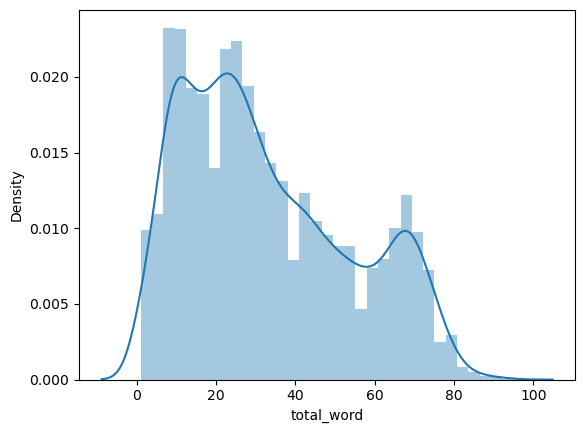

In [66]:
sns.distplot(df['total_word'])

Hasil dibawah menunjukkan nilai sisi bawah dari "total_word" tidak memiliki outlier, sedangkan sisi atas dari "total_word" memiliki outlier.

In [4]:
# Cari nilai minimum


# Cari nilai maksimum


# Cari Quartile 1


# Cari Quartile 2


# Cari Quartile 3


# Cari IQR


# Cari batas bawah


# Cari batas atas


# Cek apakah ada outlier dari batas bawah



# Cek apa ada outlier dari batas atas



##### Variance

Digunakan untuk mengukur seberapa menyebar data yang ada dari mean-nya. Jika nilai variance dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka nilai dari suatu variabel/kolom tersebut menjauhi mean.

Nilai variance dari "total_char" sebesar "14600.7" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189.614561".

Nilai variance dari "total_word" sebesar "446.9" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33.0".

In [73]:
df[['total_char', 'total_word']].var()

total_char    14563.523907
total_word      445.533067
dtype: float64

##### Standard Deviation

Digunakan untuk mengukur penyebaran observasi dalam kumpulan data relatif terhadap rata-ratanya. Jika nilai standard deviation dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka data dari suatu variabel/kolom tersebut menjauhi mean.

Nilai standard deviation dari "total_char" sebesar "14600.7" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189.614561".

Nilai standard deviation dari "total_word" sebesar "446.9" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33.0".

In [74]:
df[['total_char', 'total_word']].std()

total_char    120.679426
total_word     21.107654
dtype: float64

#### Measures of Describe Shape of Distribution
Merupakan suatu cara untuk mendeskripsikan distribusi data berdasarkan suatu grafik.

##### Skewness
Merupakan suatu cara untuk mengukur ketidaksimetrisan suatu distribusi nilai.

*   Apabila nilai skewness = 0, maka menunjukkan data berdistribusi normal.
*   Apabila nilai skewness < 0, maka menunjukkan skewness bernilai negatif.
*   Apabila nilai skewness > 0, maka menunjukkan skewness bernilai positif.

Jika kita melihat hasil di bawah nilai skewness pada "total_char" dan "total_word" bernilai positif.

In [76]:
df[['total_char', 'total_word']].skew()

total_char    0.557854
total_word    0.531858
dtype: float64

##### Kurtosis
Merupakan suatu cara untuk menunjukan derajat keruncingan, semakin besar nilai kurtosis maka kurva semakin runcing.

Kurtosis memiliki kondisi sebagai berikut:

*   Kurtosis yang memiliki nilai 3 berarti memiliki Distribusi Normal
*   Jika nilai Kurtosis kurang dari 3, dikatakan bersifat playkurtik, yang berarti cenderung menghasilkan lebih sedikit nilai outlier.
*   Jika nilai kurtosis lebih besar dari 3, dikatakan leptokurtik, yang berarti cenderung menghasilkan lebih besar nilai outlier.

Jika kita melihat hasil di bawah nilai kurtosis pada "total_char" dan "total_word" bernilai kurang dari 3 yang berarti memiliki sifat "playkurtik".

In [82]:
# """
# Data berupa pemakaian air dalam 6 bulan terakhir di kota jakarta
# pemakaian_pdam = [pemakaian_pdam_bulan_1, pemakaian_pdam_bulan_2, pemakaian_pdam_bulan_3, pemakaian_pdam_bulan_4, pemakaian_pdam_bulan_5, pemakaian_pdam_bulan_6]

# mean_of_pemakaian_pdam = data[pemakaian_pdam].mean(axis=1)
# median_of_pemakaian_pdam = data[pemakaian_pdam].median(1)
# variance_of_pemakaian = data[pemakaian_pdam].median(1)
# dst..
# """


### Visualization

Selain dengan pendekatan Descriptive Statistic, untuk mengetahui insight melalui Univariate Analysis bisa menggunakan visualisasi. 

#### Pie

Berikut contoh visualisasi Pie Chart untuk melihat persebaran total sentimen per kelasnya.

Berdasarkan gambar di bawah terlihat sentimen terbanyak ada di sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral. 

In [83]:
import matplotlib.pyplot as plt

In [92]:
df['label'].value_counts()

positive    6381
negative    3410
neutral     1138
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x1f2f7a9b0a0>,
 [Text(-0.2864567162364234, 1.062046397161181, 'positive'),
  Text(-0.06999116516771346, -1.0977710311346651, 'negative'),
  Text(1.0416675388937309, -0.3534525971259481, 'neutral')])

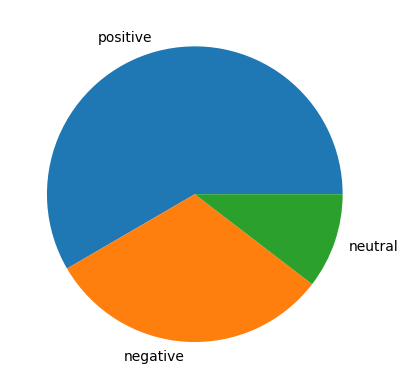

In [94]:
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index)

#### Histogram

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah karakter (total_char).

Berdasarkan gambar di bawah terlihat rata-rata panjang karakter dari data teks yang kita miliki ada pada sekitar 100-200 karakter.

In [100]:
sorted(df['total_char'])

[3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13

(array([ 405.,  942., 1100.,  927., 1102., 1050.,  770.,  666.,  604.,
         497.,  455.,  385.,  348.,  421.,  495.,  453.,  229.,   57.,
          17.,    6.]),
 array([  3.  ,  29.55,  56.1 ,  82.65, 109.2 , 135.75, 162.3 , 188.85,
        215.4 , 241.95, 268.5 , 295.05, 321.6 , 348.15, 374.7 , 401.25,
        427.8 , 454.35, 480.9 , 507.45, 534.  ]),
 <BarContainer object of 20 artists>)

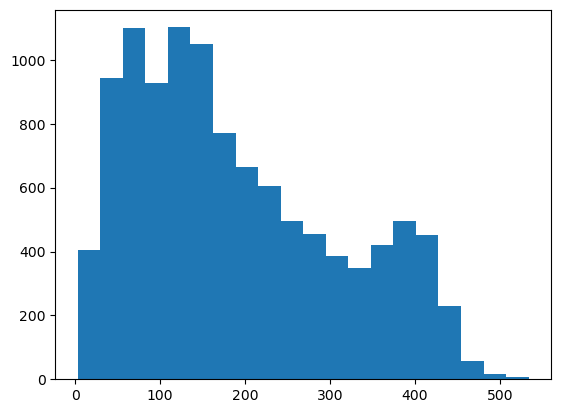

In [105]:
plt.hist(df['total_char'],bins=20)

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah word (total_word).

Berdasarkan gambar di bawah terlihat rata-rata panjang kata dari data teks yang kita miliki ada pada sekitar 20-40 kata.

(array([ 471., 1158., 1064.,  782., 1163., 1057.,  678.,  685.,  630.,
         429.,  471.,  419.,  397.,  391.,  589.,  372.,  116.,   35.,
          15.,    7.]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ,
        52.7, 57.4, 62.1, 66.8, 71.5, 76.2, 80.9, 85.6, 90.3, 95. ]),
 <BarContainer object of 20 artists>)

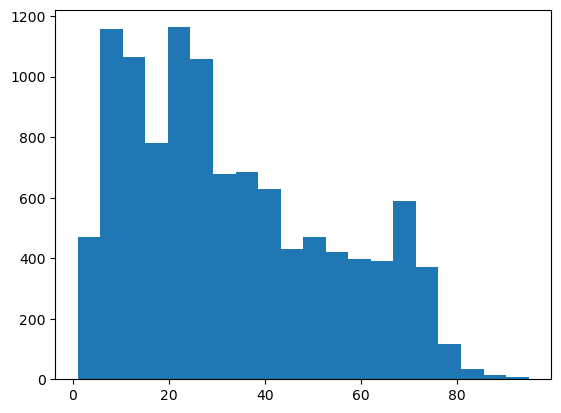

In [106]:
plt.hist(df['total_word'],bins=20)

##### Histogram & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Histogram.

Hasilnya:

*   Pada sentimen negatif, mayoritas panjang karakternya 0-200 karakter dan panjang katanya sekitar 50 kata. 
*   Pada sentimen netral, mayoritas panjang karakternya sekitar 100 karakter dan panjang katanya sekitar 25 kata.
*   Pada sentimen positif, mayoritas panjang karakternya 200-400 karakter dan panjang katanya sekitar 30-70 kata.


(array([ 353.,  391., 1264., 1097.,  860.,  684.,  654.,  815.,  248.,
          15.]),
 array([  4.,  57., 110., 163., 216., 269., 322., 375., 428., 481., 534.]),
 <BarContainer object of 10 artists>)

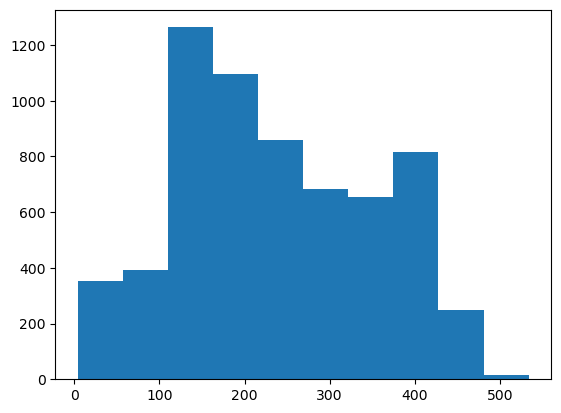

In [123]:
plt.hist(df.loc[df.label == 'positive']['total_char'])

(array([ 690., 1019.,  738.,  307.,  210.,  151.,  107.,  125.,   53.,
          10.]),
 array([  3. ,  55.3, 107.6, 159.9, 212.2, 264.5, 316.8, 369.1, 421.4,
        473.7, 526. ]),
 <BarContainer object of 10 artists>)

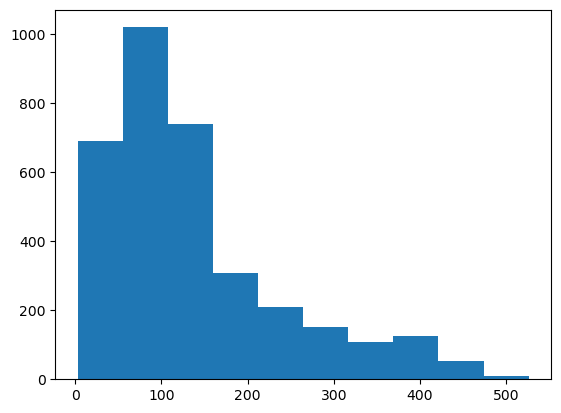

In [124]:
plt.hist(df.loc[df.label == 'negative']['total_char'])

(array([199., 568., 202.,  90.,  27.,  32.,  10.,   2.,   4.,   4.]),
 array([ 10. ,  50.3,  90.6, 130.9, 171.2, 211.5, 251.8, 292.1, 332.4,
        372.7, 413. ]),
 <BarContainer object of 10 artists>)

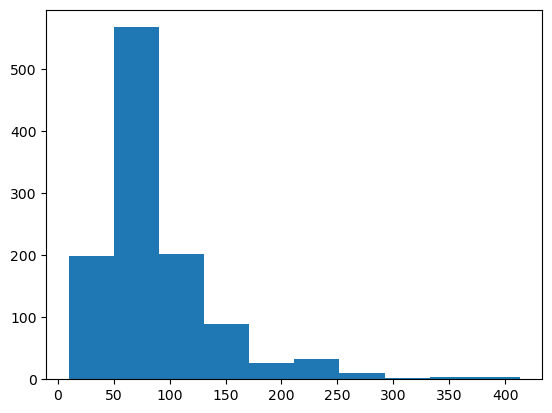

In [127]:
plt.hist(df.loc[df.label == 'neutral']['total_char'])

#### Wordcloud

Kita bisa melihat kata yang sering muncul dengan visualisasi wordcloud. Terlihat pada visualisasi di bawah kata yang sering muncul adalah "dan", "dengan", "karena", "di", "sini", "tempat", "nya".

In [130]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00


In [131]:
from wordcloud import WordCloud

In [133]:
# Visualisasi Wordcloud
full_text = " ".join(df['tweet'])
wordcloud = WordCloud().generate(full_text)

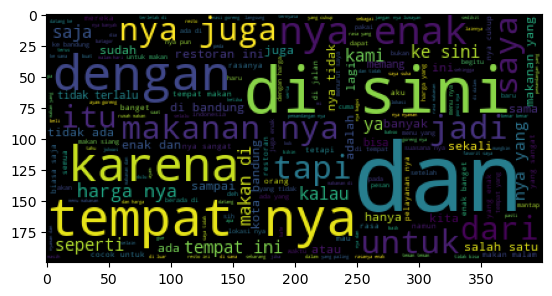

In [134]:
plt.imshow(wordcloud)
plt.show()

##### Wordcloud & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Worcloud.

Hasilnya:

*   Pada sentimen negatif, kata yang sering muncul adalah "nya", "yang", dan "dan". 
*   Pada sentimen netral, kata yang sering muncul adalah "dan", "yang", "di", "untuk", dan "dengan".
*   Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

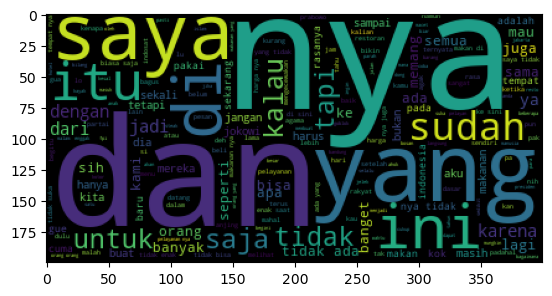

In [135]:
# Visualisasi Wordcloud sentiment negatif
full_text = " ".join(df.loc[df.label == 'negative']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

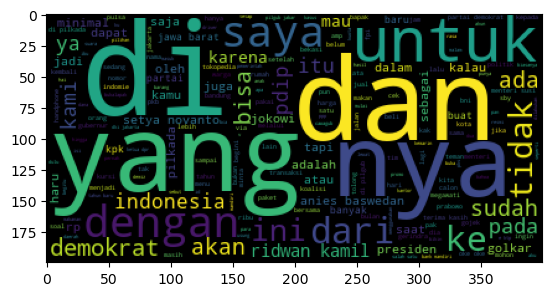

In [136]:
# Visualisasi Wordcloud sentiment neutral

full_text = " ".join(df.loc[df.label == 'neutral']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

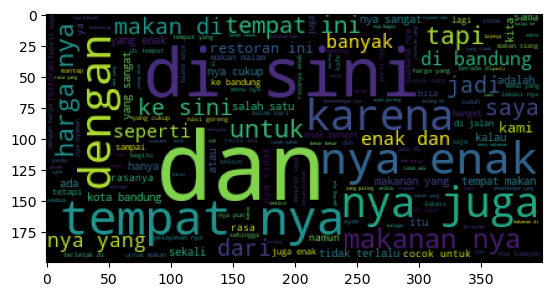

In [137]:
# Visualisasi Wordcloud sentiment positif
full_text = " ".join(df.loc[df.label == 'positive']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

# Analisa Korelasi Kata 'Enak' dengan label positive

In [154]:
df['apakah_ada_kata_enak'] = df['tweet'].apply(lambda x: 1 if "saya" in x else 0)

In [155]:
df['is_label_positive'] = df['label'].apply(lambda x: 1 if x == "positive" else 0)

In [156]:
df[['apakah_ada_kata_enak', 'is_label_positive']].corr()

,apakah_ada_kata_enak,is_label_positive
apakah_ada_kata_enak,1.000000,0.171497
is_label_positive,0.171497,1.000000


In [144]:
df[['tweet']]

,tweet
0,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...
3,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...
...,...
10993,f - demokrat dorong upaya kemandirian energi n...
10994,tidak bosan
10996,enak rasa masakan nya apalagi kepiting yang me...
10998,"pagi pagi di tol pasteur sudah macet parah , b..."


## Bivariate Analysis

### Descriptive Statistic

Untuk melakukan Bivariate Analysis kita bisa mengkombinasikan pendekatan statistik dan visualisasi sama seperti Univariate Analysis.

#### Pearson Correlation
Pearson Correlation mengukur linear dependence antara 2 variabel X dan Y.
Hasilnya berupa angka diantara -1 dan 1, dimana:
- 1: total positive linear correlation,
- 0: no linear correlation, the two variables most likely do not affect each other
- -1: total negative linear correlation.

Pada hasil di bawah, antara "total_word" dan "total_char" memiliki korelasi positif karena mendekati nilai 1:



*   "total_world" -> "total_char": 0.99
*   "total_char" -> "total_world": 0.99



In [159]:
df[['total_word','total_char']].corr()

,total_word,total_char
total_word,1.000000,0.991305
total_char,0.991305,1.000000


### Visualization

#### Scatter

Angka korelasi positif sebelumnya terkonfirmasi dari visualisasi scatter di bawah. Terlihat pola yang dihasilkan linier dari pojok kiri bawah ke pojok kanan atas.

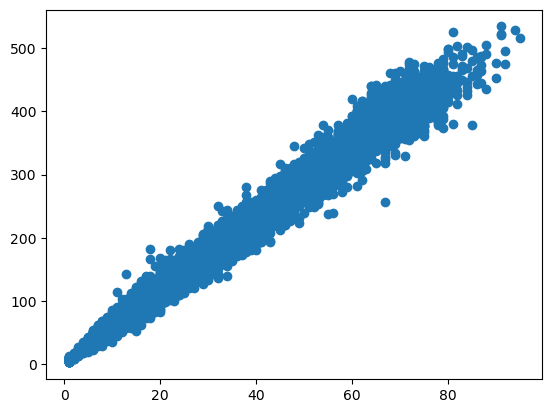

In [160]:
plt.scatter(x=df['total_word'], y=df['total_char'])

#### Bar

##### Total Word + Label

Kita bisa melihat kombinasi visualisasi antara total_word dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki kata yang paling panjang

<BarContainer object of 93 artists>

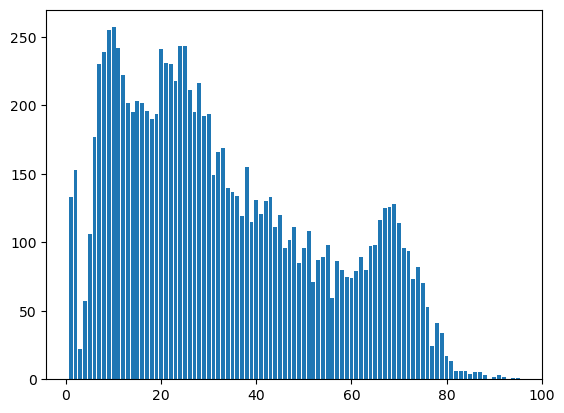

In [162]:
plt.bar(df['total_word'].value_counts().index, df['total_word'].value_counts())

##### Total Char + Label

Kita bisa melihat kombinasi visualisasi antara total_char dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki karakter yang paling panjang

<BarContainer object of 10929 artists>

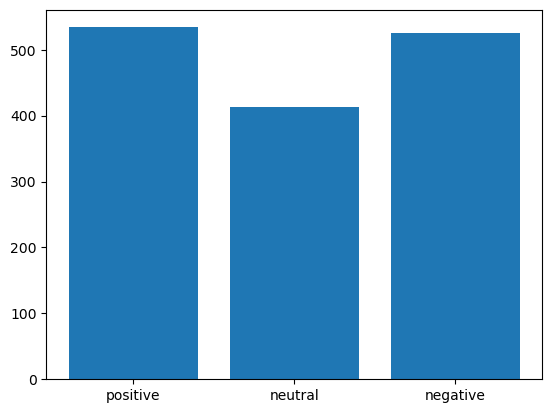

In [164]:
plt.bar(df['label'], df['total_char'])

# Conclusion

Berdasarkan analisis yang sudah kita lakukan, ada beberapa insight yang bisa kita ambil:

*   Berdasarkan Univariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan data yang kita olah memiliki outlier namun tidak terlalu signifikan
  *  Dalam visualisasi menunjukkan:
      *  Total karakter dan total kata memiliki panjang 100-200 karakter dan 24-40 kata.
      *  Sentimen terbanyak adalah sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral.
      *  Total karakter dan kata yang paling banyak adalah sentimen positif yakni 200-400 karakter dan 30-70 kata.
      *  Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

*   Berdasarkan Bivariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan variabel total karakter dan total kata memiliki korelasi positif. 
  *  Dalam visualisasi menunjukkan:
      *  Variabel total karakter dan total kata terkonfirmasi memiliki korelasi positif
      *  Total karakter dan kata yang paling banyak adalah sentimen positif.